# Starting the model
Make sure that you followed the [installation guide](https://github.com/allfed/Seaweed-Growth-Model/blob/main/README.md#installation) of the repository and also created a kernel for your jupyter notebook. 

In [1]:
# Test if you can import the model
# This should run without any problems if you installed the model correctly
import src

In [2]:
# go to the root of the repository, so the notebook can find all the files
import os
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)

# Preprocessing
The preprocessing takes the original environmental data and transforms it into a format that the seaweed growth model can understand. This is done in one function, that can be called with different arguments, depending on what scenario should be preprocessed. The data delivered with this repository is only for the US, as the main dataset is too large for Github. However, the code is called exactly the same way for the main dataset. 

In [3]:
# importing the preprocessing file
from src.processing import preprocessing

In [4]:
# The function needs 5 keywords:
# path: the path for the pickled files
# folder: the folder where the pickled files are
# file_ending: the ending of the pickled files (this differs by the number of months we look at)
# global_or_US: if "global", the global data is used
# scenario: the scenario to use (e.g. 150tg)
path = "." # go one folder up to leave the script folder
folder = "gridded_data_test_dataset_AUS_only"
scenario = "150tg"
file_ending = "36_months_150tg"
global_or_country = "AUS"

In [5]:
# Prepare the test dataset with only the selected country
preprocessing.prepare_gridded_data(
    path,
    folder,
    scenario,
    file_ending,
    global_or_country
)

This will create a file called "data_gridded_all_parameters_US.pkl" in the folder data/interim_data/150tg", which contains all environmental data. This step is needed, as the single files from the original data source take a long time to load and having it all in one file speeds things up. 


# Postprocessing
The postprocessing part of the repository calls the model with the data we just created. Once the model has run, postprocessing saves the results and then does a time series analysis on it, to determine how many clusters are in the dataset. 

In [6]:
# importing the postprocessing file
from src.processing import postprocessing
# the warning can be ignored, as we don't use hdf5

/home/florian/local/anaconda3/envs/seaweed-growth-model/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [7]:
# Next do the 150tg postprocessing
postprocessing.grid(scenario, global_or_country)
# This takes some time, as the dataset is larger than the ones from the LMEs
# If it finishes instantly, this is due to the data already being present from earlier runs.

Working with the gridded data
Creating the dataframe
Getting parameter salinity_factor
Getting parameter nutrient_factor
Getting parameter illumination_factor
Getting parameter temp_factor
Getting parameter nitrate_subfactor
Getting parameter ammonium_subfactor
Getting parameter phosphate_subfactor
Getting parameter seaweed_growth_rate
Clustering the data
Getting parameter salinity_factor for clustering
Getting parameter nutrient_factor for clustering
Getting parameter illumination_factor for clustering
Getting parameter temp_factor for clustering
Getting parameter nitrate_subfactor for clustering
Getting parameter ammonium_subfactor for clustering
Getting parameter phosphate_subfactor for clustering
Getting parameter seaweed_growth_rate for clustering


# Plotting
Next we can plot the the results from postprocessing. We can recreate most plots by calling the main function from the plotting files. 

In [8]:
# importing the plotting file
# Creates the plots based on the grid
from src.plotting import plotter_grid
# Creates the plots based on the LMEs
from src.plotting import plotter_lme
# Creates the plots for the suplementary information
from src.plotting import plotter_methods

Plotting cluster spatial
Plotting growth rate by year
Plotting cluster timeseries with q lines


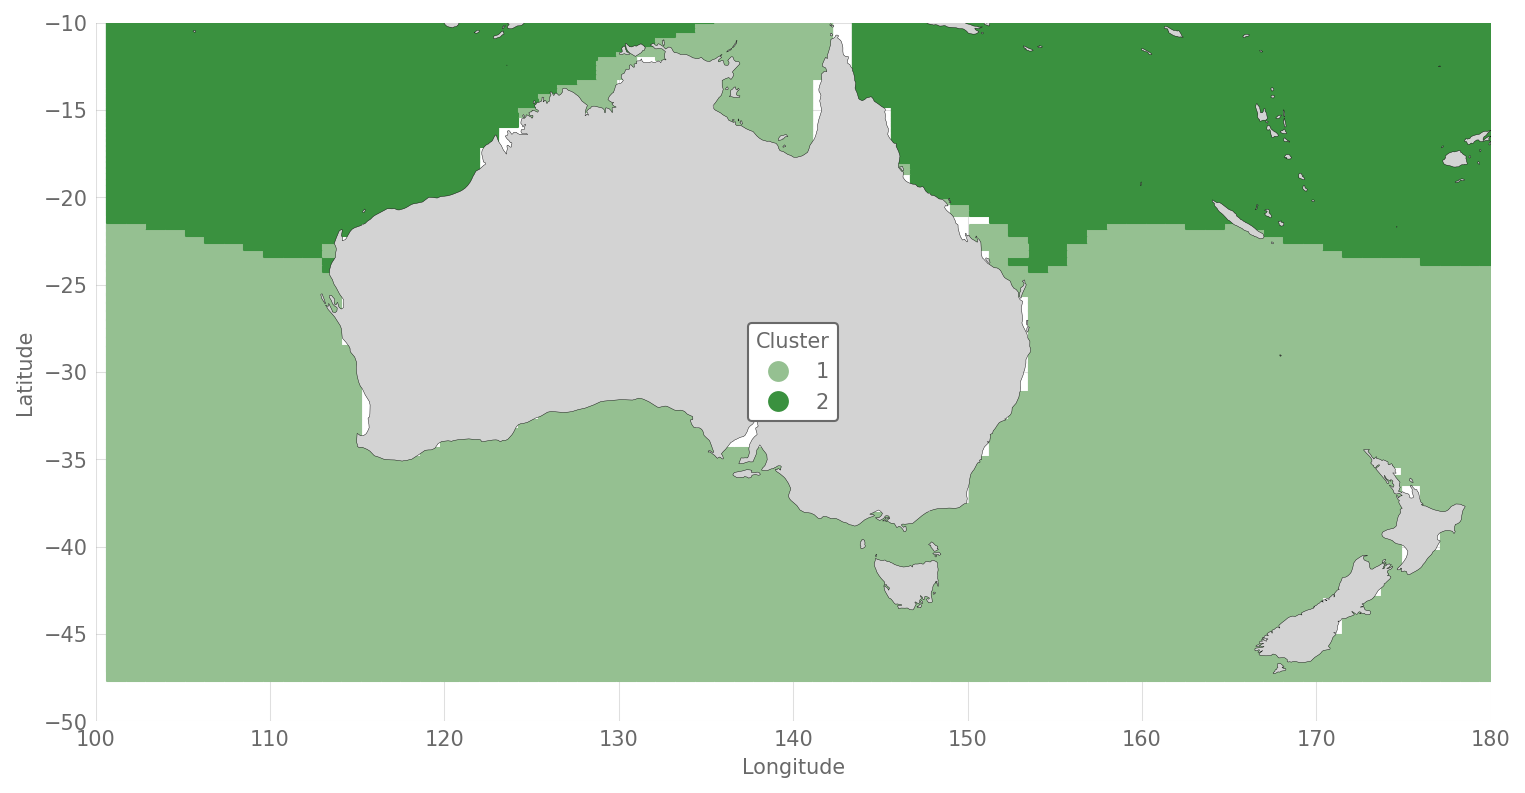

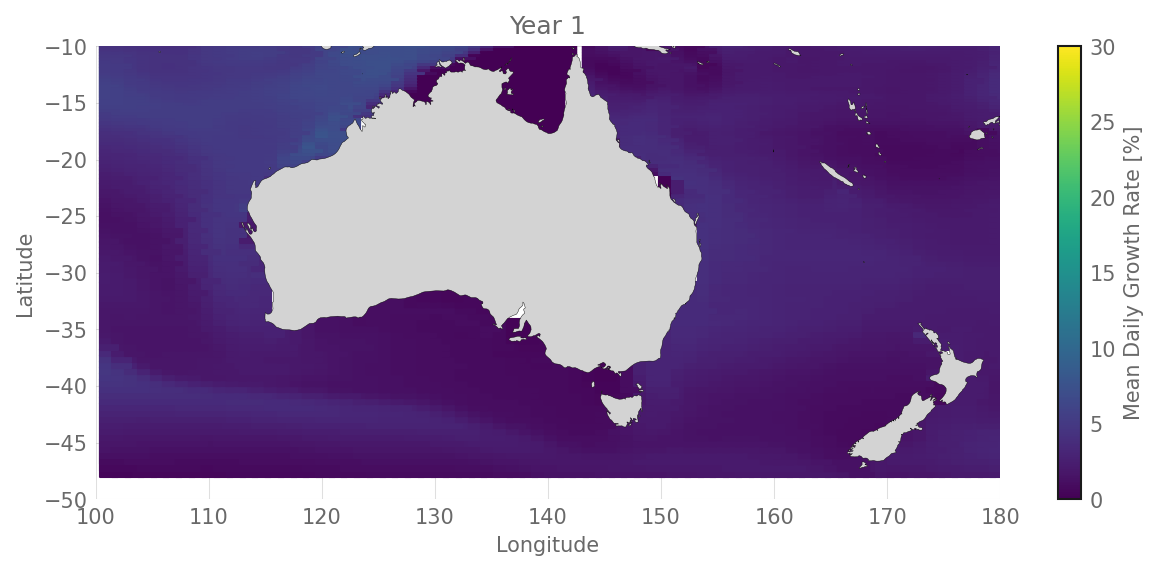

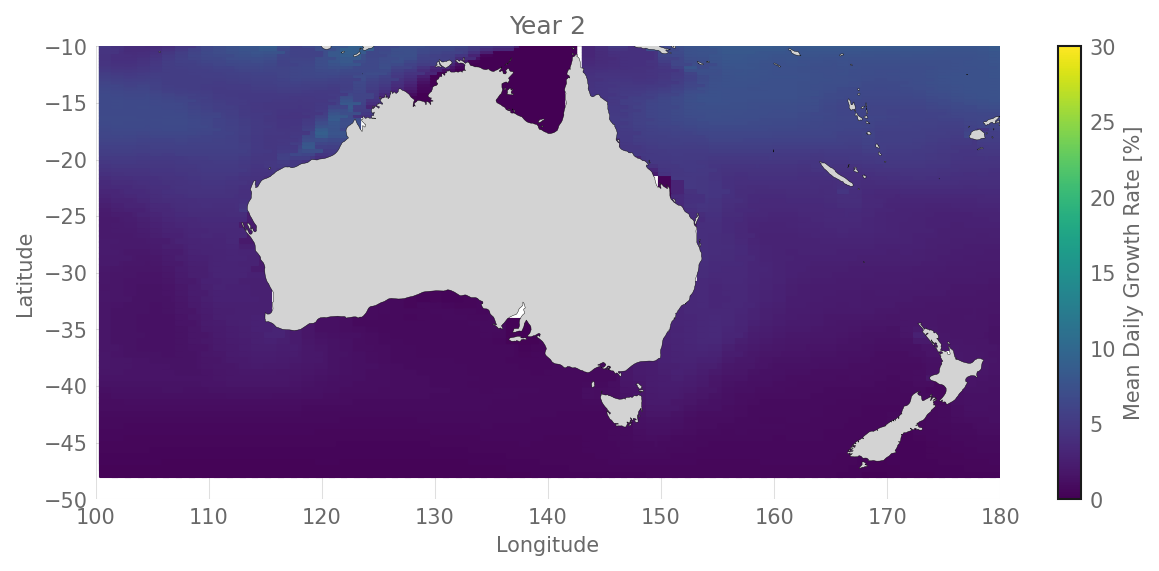

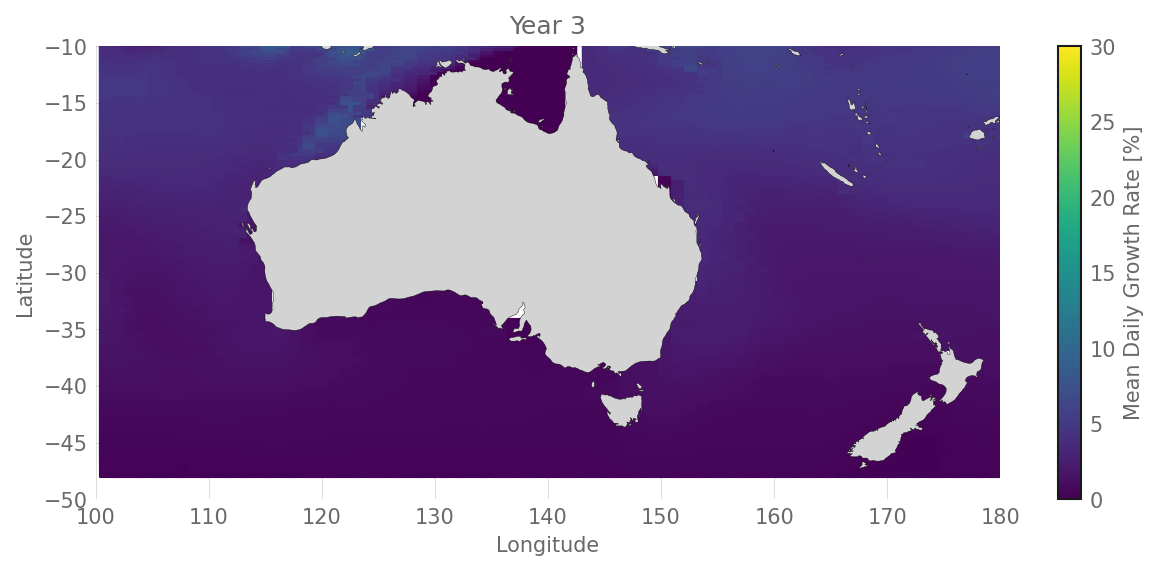

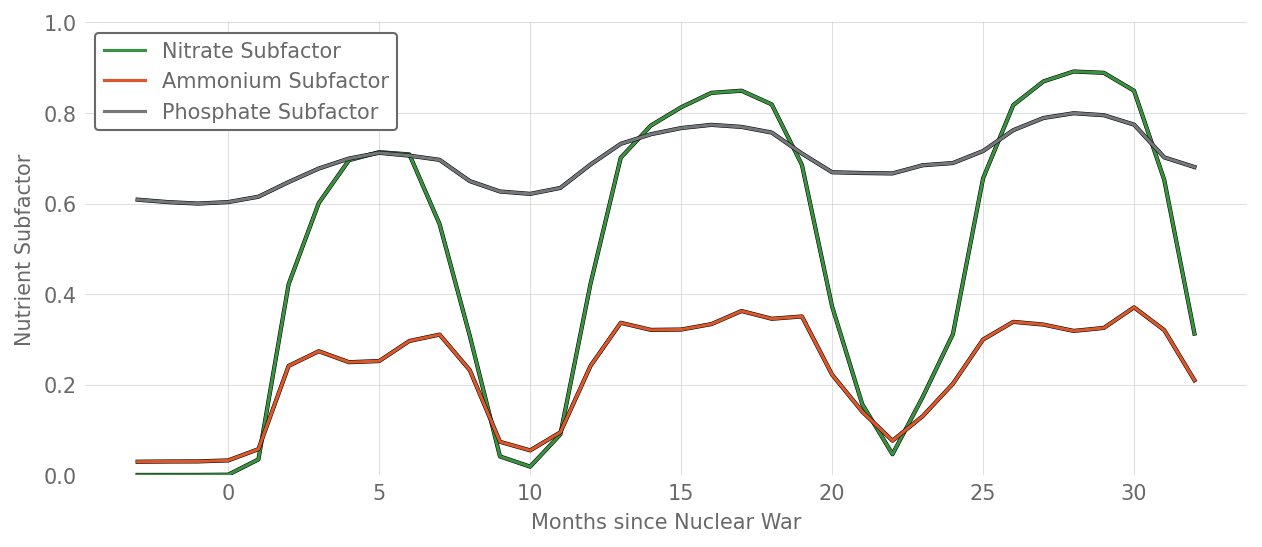

In [9]:
# Call the grid plots
plotter_grid.main(scenario, global_or_country, 30)
# The plots are saved in the result folder in the 

# Wrapping it up
All the plots are saved in the results folder. The repository works analogous to this example when run with the global dataset. Everything just takes considerably longer, as the data is much larger. 